<h2 align="center">Image Compression with K-means Clustering</h2>

### Task 1: Importing Libraries
---

In [ ]:
from __future__ import print_function
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use("ggplot")

from skimage import io
from sklearn.cluster import KMeans

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets

In [ ]:
plt.rcParams['figure.figsize'] = (20, 12)

### Task 2: Data Preprocessing 
---

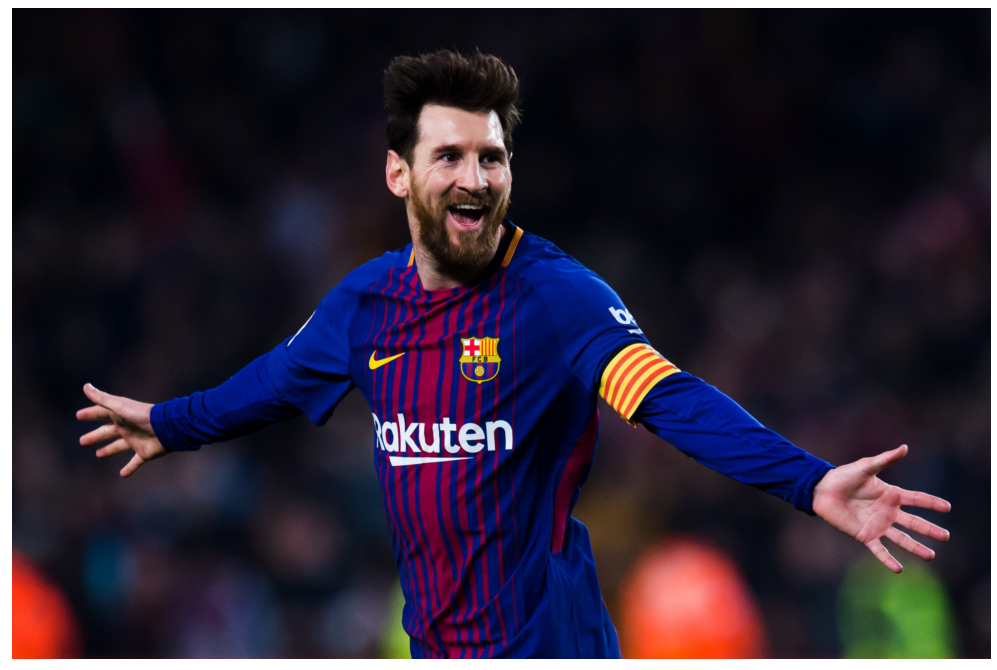

In [ ]:
img = io.imread('1.png')
ax = plt.axes(xticks=[],yticks=[])
ax.imshow(img)

In [ ]:
img.shape


(1760, 2644, 3)

In [ ]:
image_data = (img/255.0).reshape(-1,3)

### Task 3: Visualizing the Color Space using Point Clouds
---

In [ ]:
from plot_utils import plot_utils


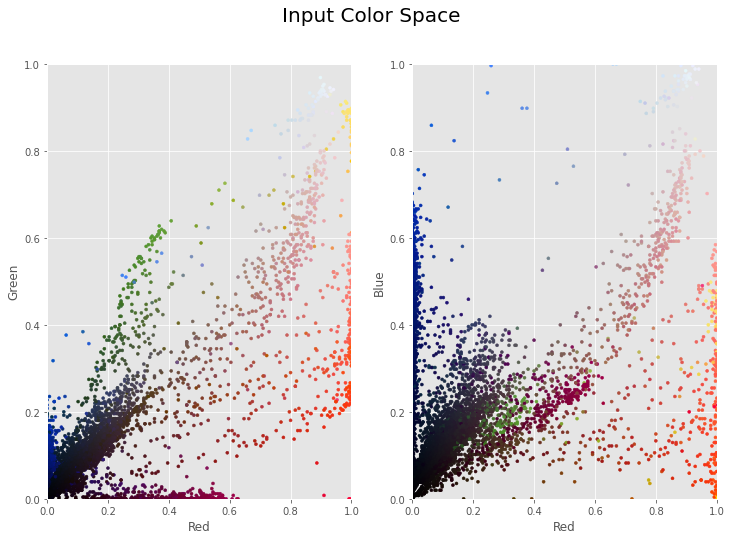

In [ ]:
x= plot_utils(image_data,title="Input Color Space")
x.colorSpace()


### Task 4: Visualizing the K-means Reduced Color Space
---

In [ ]:
from sklearn.cluster import MiniBatchKMeans

In [ ]:
kmeans = MiniBatchKMeans(16).fit(image_data)
k_colors = kmeans.cluster_centers_[kmeans.predict(image_data)]
y = plot_utils(image_data,colors = k_colors,title="Reduced Color Space")



### Task 5: K-means Image Compression with Interactive Controls
---

In [ ]:
@interact
def compression(k=IntSlider(16,0,256,1,continuous_update=False)):
  image = io.imread('1.png')
  img_data =(image/255.0).reshape(-1,3)
  kmeans = MiniBatchKMeans(k).fit(img_data)
  k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]
  k_img = np.reshape(k_colors, (image.shape))
  fig, (ax1,ax2) = plt.subplots(1,2)
  ax1.set_title("Real")
  ax1.set_xticks([])
  ax1.set_yticks([])
  ax1.imshow(image)
  
  ax2.set_title("Compressed ")
  ax2.set_xticks([])
  ax2.set_yticks([])
  ax2.imshow(k_img)

  plt.show()
  

  




interactive(children=(IntSlider(value=16, continuous_update=False, description='k', max=256), Output()), _dom_…